<a href="https://colab.research.google.com/github/Seiko-5/R-for-Data-Analytics/blob/main/R_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Load Data into R with readxl

In [8]:
library(readxl)
library(readr)

In [9]:
queens <- read_excel("/content/rollingsales_queens.xlsx", skip = 4)
brooklyn <- read_excel("/content/rollingsales_brooklyn.xlsx", skip = 4)
statenisland <- read_excel("/content/rollingsales_statenisland.xlsx", skip = 4)
bronx <- read_excel("/content/rollingsales_bronx.xlsx", skip = 4)
manhattan <- read_excel("/content/rollingsales_manhattan.xlsx", skip = 4)

In [10]:
housing <- read_csv("/content/tp3_boston_data.csv")

Rows: 506 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, lstat...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# 02. Inspecting Data Set

###View the Data with tidyr::glimpse()

###The glimpse() function provides a user-friendly way to view the column names and data types for all columns, or variables, in the data frame

In [11]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ dplyr   1.0.10
✔ tibble  3.1.8      ✔ stringr 1.4.1 
✔ tidyr   1.2.1      ✔ forcats 0.5.2 
✔ purrr   1.0.1      

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [12]:
# Data set's information
glimpse(housing)

Rows: 506
Columns: 13
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <dbl> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15…
$ lstat   <dbl> 4.98, 9.14, 4.03, 2.94, 5.33, 5.21, 12.43, 19.15, 29.93, 17.10…
$ medv    <dbl> 24

In [13]:
#Missing Values Count
print(sum(is.na(housing)))

[1] 0


In [14]:
# finds the location of missing values
print(which(is.na(housing)))

integer(0)


In [15]:
## Inspect the data set's 1st rows
head(housing, 5)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [16]:
tail(housing,5)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,9.67,22.4
0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21,9.08,20.6
0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21,5.64,23.9
0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,6.48,22.0
0.04741,0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21,7.88,11.9


#03. Descriptive Statistics

## 03.01 pastecs

In [17]:
# nbr.val, nbr.null, nbr.na, min max, range, sum,
# median, mean, SE.mean, CI.mean, var, std.dev, coef.var
install.packages('pastecs')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [18]:
library(pastecs)


Attaching package: ‘pastecs’


The following objects are masked from ‘package:dplyr’:

    first, last


The following object is masked from ‘package:tidyr’:

    extract




In [19]:
stat.desc(housing)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,506.0000000,506.000000,506.0000000,506.00000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.0000000,5.060000e+02,5.060000e+02,506.0000000,5.060000e+02
nbr.null,0.0000000,372.000000,0.0000000,471.00000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000,0.000000e+00,0.000000e+00,0.0000000,0.000000e+00
nbr.na,0.0000000,0.000000,0.0000000,0.00000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000,0.000000e+00,0.000000e+00,0.0000000,0.000000e+00
min,0.0063200,0.000000,0.4600000,0.00000000,3.850000e-01,3.561000e+00,2.900000e+00,1.129600e+00,1.0000000,1.870000e+02,1.260000e+01,1.7300000,5.000000e+00
max,88.9762000,100.000000,27.7400000,1.00000000,8.710000e-01,8.780000e+00,1.000000e+02,1.212650e+01,24.0000000,7.110000e+02,2.200000e+01,37.9700000,5.000000e+01
range,88.9698800,100.000000,27.2800000,1.00000000,4.860000e-01,5.219000e+00,9.710000e+01,1.099690e+01,23.0000000,5.240000e+02,9.400000e+00,36.2400000,4.500000e+01
sum,1828.4429200,5750.000000,5635.2100000,35.00000000,2.806757e+02,3.180025e+03,3.469890e+04,1.920292e+03,4832.0000000,2.065680e+05,9.338500e+03,6402.4500000,1.140160e+04
median,0.2565100,0.000000,9.6900000,0.00000000,5.380000e-01,6.208500e+00,7.750000e+01,3.207450e+00,5.0000000,3.300000e+02,1.905000e+01,11.3600000,2.120000e+01
mean,3.6135236,11.363636,11.1367787,0.06916996,5.546951e-01,6.284634e+00,6.857490e+01,3.795043e+00,9.5494071,4.082372e+02,1.845553e+01,12.6530632,2.253281e+01


## 03.02 Hmisc

In [20]:
# n, nmiss, unique, mean, 5,10,25,50,75,90,95th percentiles
# 5 lowest and 5 highest scores
install.packages('Hmisc')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘deldir’, ‘RcppEigen’, ‘png’, ‘jpeg’, ‘interp’, ‘checkmate’, ‘htmlwidgets’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’




In [21]:
library(Hmisc)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [22]:
describe(housing)

housing 

 13  Variables      506  Observations
--------------------------------------------------------------------------------
crim 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     506        0      504        1    3.614    5.794  0.02791  0.03819 
     .25      .50      .75      .90      .95 
 0.08204  0.25651  3.67708 10.75300 15.78915 

lowest :  0.00632  0.00906  0.01096  0.01301  0.01311
highest: 45.74610 51.13580 67.92080 73.53410 88.97620
--------------------------------------------------------------------------------
zn 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     506        0       26    0.603    11.36    18.77      0.0      0.0 
     .25      .50      .75      .90      .95 
     0.0      0.0     12.5     42.5     80.0 

lowest :   0.0  12.5  17.5  18.0  20.0, highest:  82.5  85.0  90.0  95.0 100.0
--------------------------------------------------------------------------------
indus 
       n  missing distinct 

## 03.03 psych

In [23]:
install.packages('psych')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’




In [24]:
library(psych)


Attaching package: ‘psych’


The following object is masked from ‘package:Hmisc’:

    describe


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [25]:
describe(housing)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
crim,1,506,3.61352356,8.6015451,0.25651,1.6816300,0.3283218,0.00632,88.9762,88.96988,5.1922223,36.59581589,0.382385321
zn,2,506,11.36363636,23.3224530,0.00000,5.0800493,0.0000000,0.00000,100.0000,100.00000,2.2124881,3.95238731,1.036809500
indus,3,506,11.13677866,6.8603529,9.69000,10.9318719,9.3700320,0.46000,27.7400,27.28000,0.2932747,-1.24019490,0.304979888
chas,4,506,0.06916996,0.2539940,0.00000,0.0000000,0.0000000,0.00000,1.0000,1.00000,3.3857377,9.48197035,0.011291412
nox,5,506,0.55469506,0.1158777,0.53800,0.5450601,0.1297275,0.38500,0.8710,0.48600,0.7249897,-0.08741064,0.005151391
rm,6,506,6.28463439,0.7026171,6.20850,6.2528744,0.5122383,3.56100,8.7800,5.21900,0.4012223,1.84183241,0.031235142
age,7,506,68.57490119,28.1488614,77.50000,71.1960591,28.9848300,2.90000,100.0000,97.10000,-0.5954162,-0.97802966,1.251369525
dis,8,506,3.79504269,2.1057101,3.20745,3.5393786,1.9142590,1.12960,12.1265,10.99690,1.0057898,0.45759158,0.093610233
rad,9,506,9.54940711,8.7072594,5.00000,8.7339901,2.9652000,1.00000,24.0000,23.00000,0.9988651,-0.87892910,0.387084894


## 03.04 Summary of data

In [26]:
summary(housing)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

# 04. Visualization & Plotting

In [28]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [29]:
library(ggplot2)

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


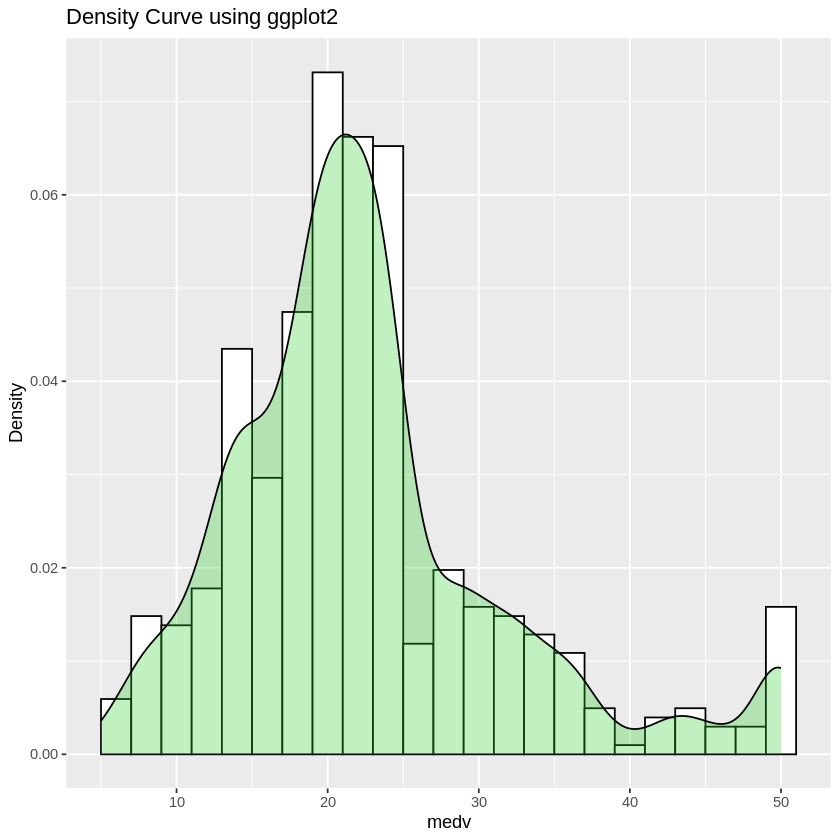

In [30]:
# Histogram with density instead of count on y-axis
ggplot(housing, aes(x=medv)) +
    geom_histogram(aes(y=..density..),      
                   binwidth=2,
                   colour="black", fill="white") +
    geom_density(alpha=.3, fill="#32CD32") +

labs(x = "medv", y = "Density", title = "Density Curve using ggplot2") 



Warning message in (function (z, notch = FALSE, width = NULL, varwidth = FALSE, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”


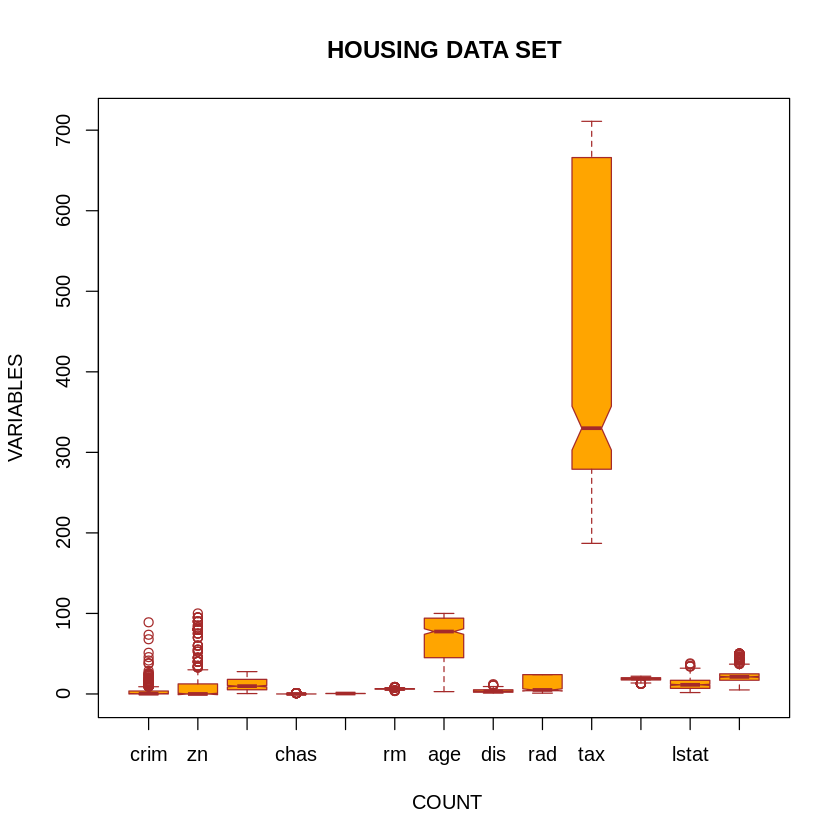

In [31]:
# Create box plots

boxplot(housing,
main = "HOUSING DATA SET",
xlab = " COUNT",
ylab = "VARIABLES",
col = "orange",
border = "brown",
horizontal = FALSE,
notch = TRUE
)

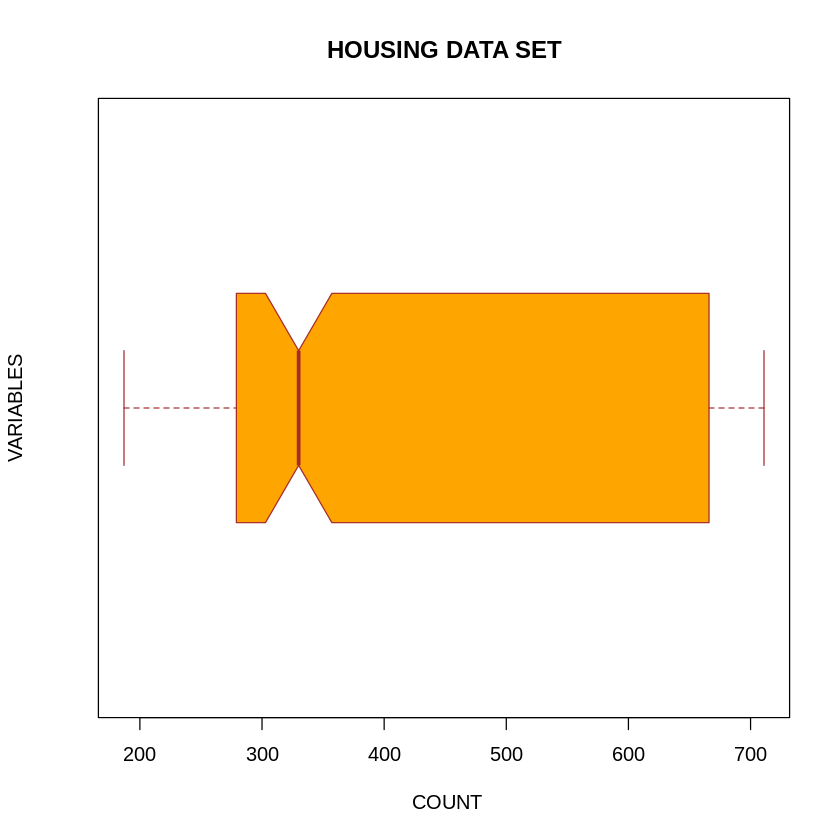

In [32]:
# Create box plots for single veriable

boxplot(housing$tax,
main = "HOUSING DATA SET",
xlab = " COUNT",
ylab = "VARIABLES",
col = "orange",
border = "brown",
horizontal = TRUE,
notch = TRUE
)

In [33]:
# create a correlation matrix that measures the linear relationships between the variables. 

housing.cor = cor(housing)
print(housing.cor)

               crim          zn       indus         chas         nox
crim     1.00000000 -0.20046922  0.40658341 -0.055891582  0.42097171
zn      -0.20046922  1.00000000 -0.53382819 -0.042696719 -0.51660371
indus    0.40658341 -0.53382819  1.00000000  0.062938027  0.76365145
chas    -0.05589158 -0.04269672  0.06293803  1.000000000  0.09120281
nox      0.42097171 -0.51660371  0.76365145  0.091202807  1.00000000
rm      -0.21924670  0.31199059 -0.39167585  0.091251225 -0.30218819
age      0.35273425 -0.56953734  0.64477851  0.086517774  0.73147010
dis     -0.37967009  0.66440822 -0.70802699 -0.099175780 -0.76923011
rad      0.62550515 -0.31194783  0.59512927 -0.007368241  0.61144056
tax      0.58276431 -0.31456332  0.72076018 -0.035586518  0.66802320
ptratio  0.28994558 -0.39167855  0.38324756 -0.121515174  0.18893268
lstat    0.45562148 -0.41299457  0.60379972 -0.053929298  0.59087892
medv    -0.38830461  0.36044534 -0.48372516  0.175260177 -0.42732077
                 rm         age   

In [34]:
#correlation coefficient - Spearman or Kendall coefficients

housing.cor = cor(housing, method = c("spearman")) # can use Kendall
print(housing.cor)

               crim         zn       indus        chas         nox          rm
crim     1.00000000 -0.5716602  0.73552374  0.04153689  0.82146466 -0.30911647
zn      -0.57166021  1.0000000 -0.64281060 -0.04193700 -0.63482840  0.36107373
indus    0.73552374 -0.6428106  1.00000000  0.08984138  0.79118913 -0.41530129
chas     0.04153689 -0.0419370  0.08984138  1.00000000  0.06842628  0.05881292
nox      0.82146466 -0.6348284  0.79118913  0.06842628  1.00000000 -0.31034391
rm      -0.30911647  0.3610737 -0.41530129  0.05881292 -0.31034391  1.00000000
age      0.70413998 -0.5444226  0.67948671  0.06779178  0.79515291 -0.27808202
dis     -0.74498614  0.6146265 -0.75707970 -0.08024808 -0.88001486  0.26316822
rad      0.72780697 -0.2787672  0.45550745  0.02457888  0.58642870 -0.10749220
tax      0.72904490 -0.3713945  0.66436139 -0.04448577  0.64952656 -0.27189846
ptratio  0.46528319 -0.4484754  0.43371046 -0.13606462  0.39130908 -0.31292257
lstat    0.63476026 -0.4900739  0.63874741 -0.050574

In [35]:
library("Hmisc")

In [36]:
#Significance levels (p-values)
housing.rcorr = rcorr(as.matrix(housing))
housing.rcorr

         crim    zn indus  chas   nox    rm   age   dis   rad   tax ptratio
crim     1.00 -0.20  0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58    0.29
zn      -0.20  1.00 -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31   -0.39
indus    0.41 -0.53  1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72    0.38
chas    -0.06 -0.04  0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04   -0.12
nox      0.42 -0.52  0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67    0.19
rm      -0.22  0.31 -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29   -0.36
age      0.35 -0.57  0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51    0.26
dis     -0.38  0.66 -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53   -0.23
rad      0.63 -0.31  0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91    0.46
tax      0.58 -0.31  0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00    0.46
ptratio  0.29 -0.39  0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46    1.00
lstat    0.46 -0.41  0.60 -0.05  0.59 -0.61  0.60 -0.50  0.49  0.54    0.37
medv    -0.3

In [37]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [38]:
library(corrplot)

corrplot 0.92 loaded



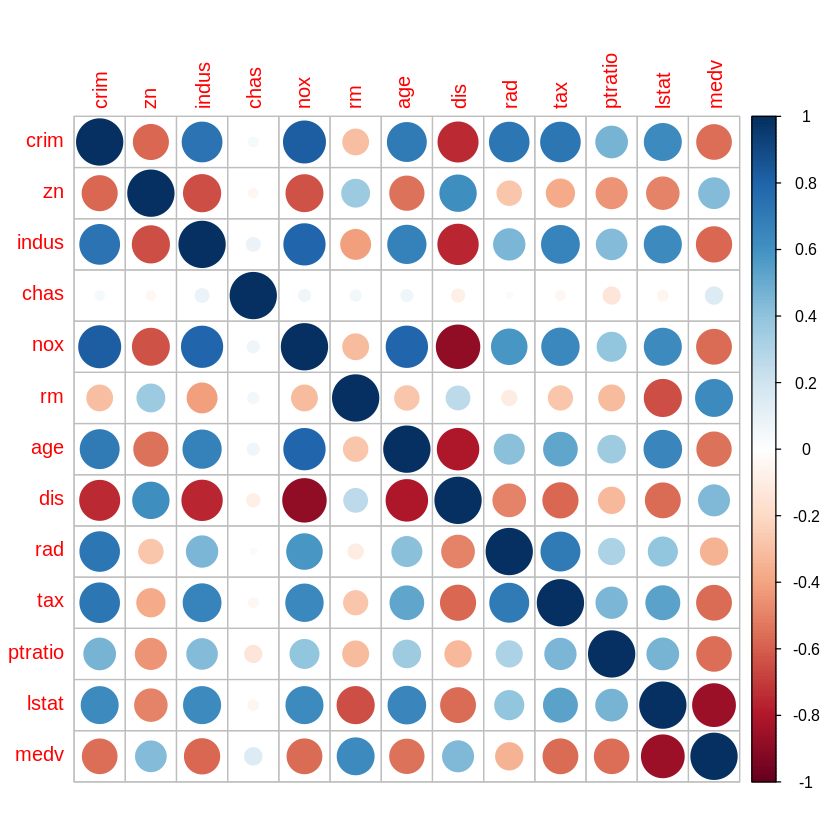

In [39]:
#Visualizing the correlation matrix
corrplot(housing.cor)

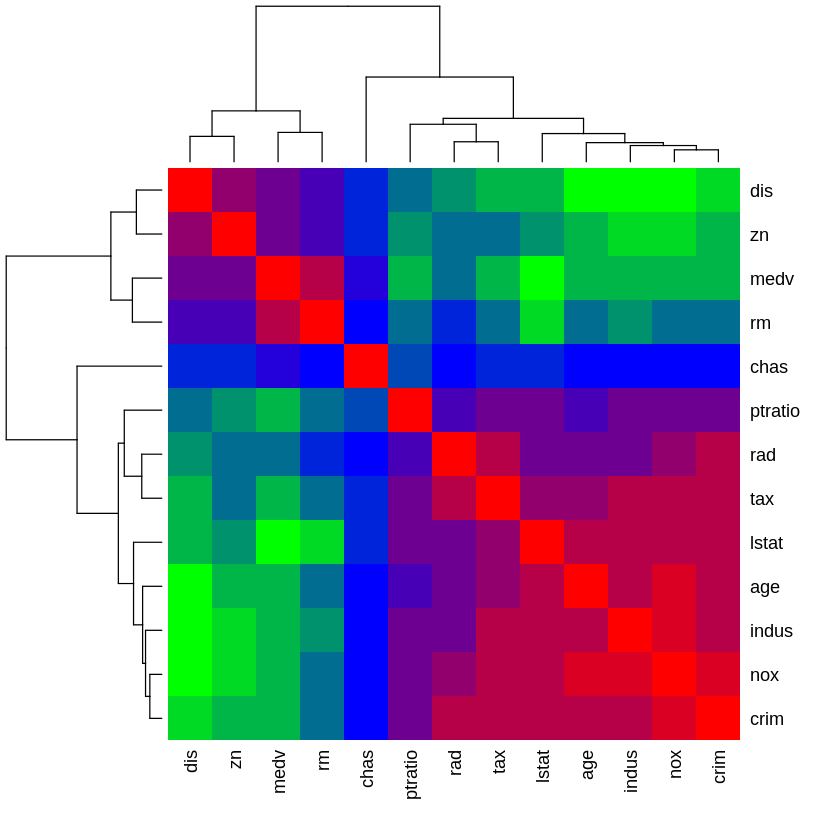

In [40]:
#Heatmap

palette = colorRampPalette(c("green", "blue", "red")) (15)
heatmap(x = housing.cor, col = palette, symm = TRUE)

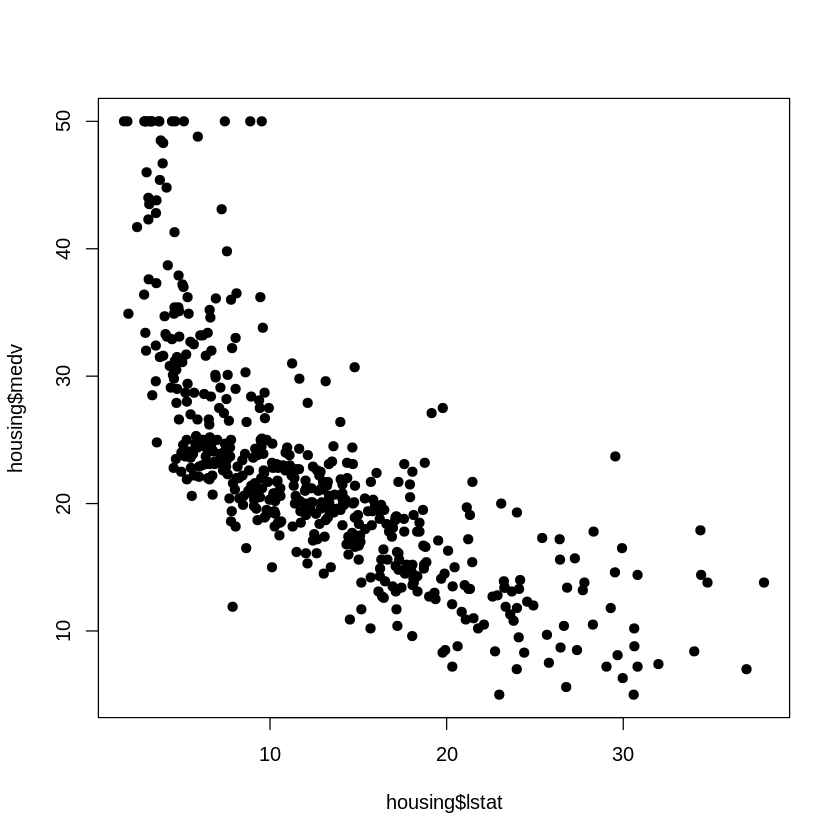

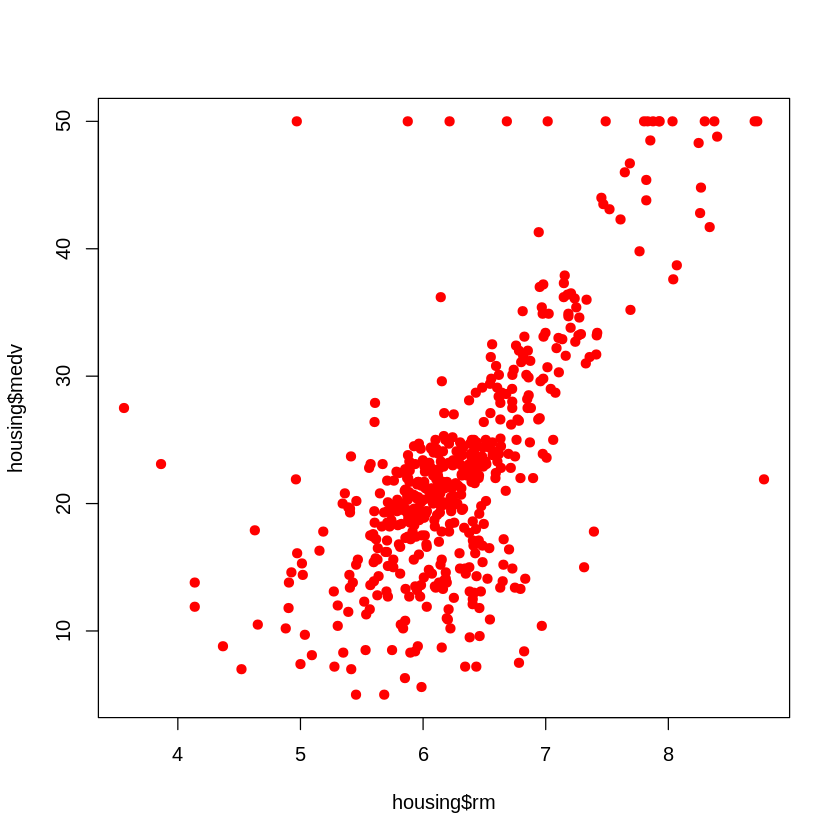

In [41]:
# Based on the above observations we will RM and LSTAT as our features. 

#Using a scatter plot let’s see how these features vary with MEDV.

plot(housing$lstat, housing$medv, pch = 19, col = 'black') 

plot(housing$rm, housing$medv, pch = 19, col = 'red')


# 05. Pre-Processing and Feature Engineering Data Set

In [42]:
library(Hmisc)

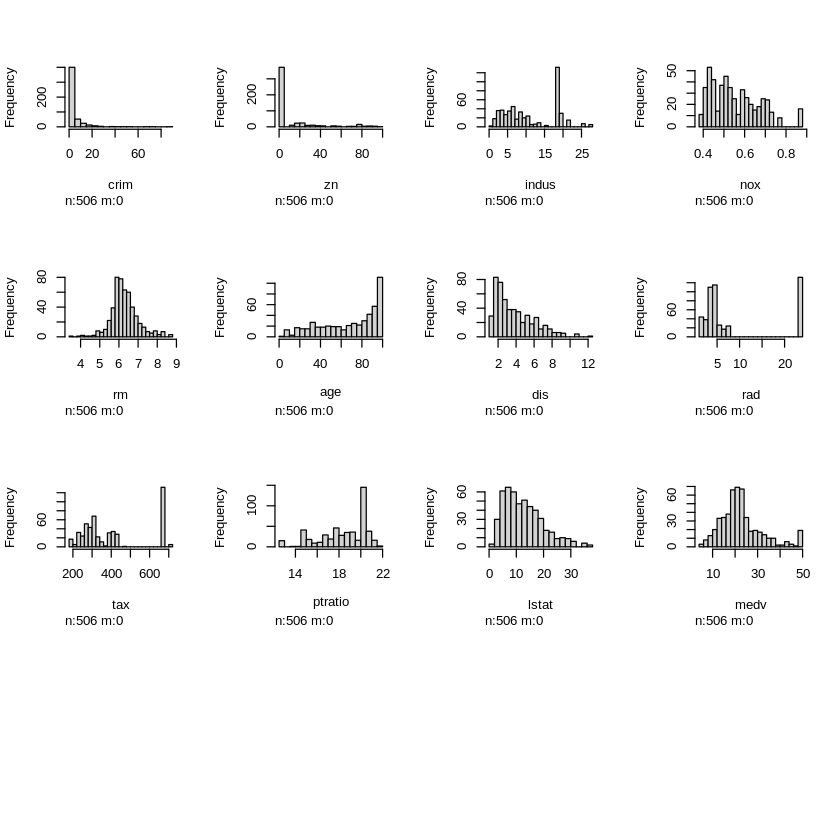

In [43]:
hist.data.frame(housing)

In [44]:
# Calculate the skewness and then sort


In [46]:
# calculate skewness in r

install.packages("moments")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [47]:
library(moments)

In [48]:
skewness(housing)

crim         zn      indus       chas        nox         rm        age 
 5.2076524  2.2190631  0.2941463  3.3957993  0.7271442  0.4024147 -0.5971856 
       dis        rad        tax    ptratio      lstat       medv 
 1.0087788  1.0018335  0.6679683 -0.7999445  0.9037707  1.1048108

We can address skewed variables by transforming them (i.e. applying the same function to each value). 

Common transformations include square root (sqrt(x)), logarithmic (log(x)), and reciprocal (1/x).

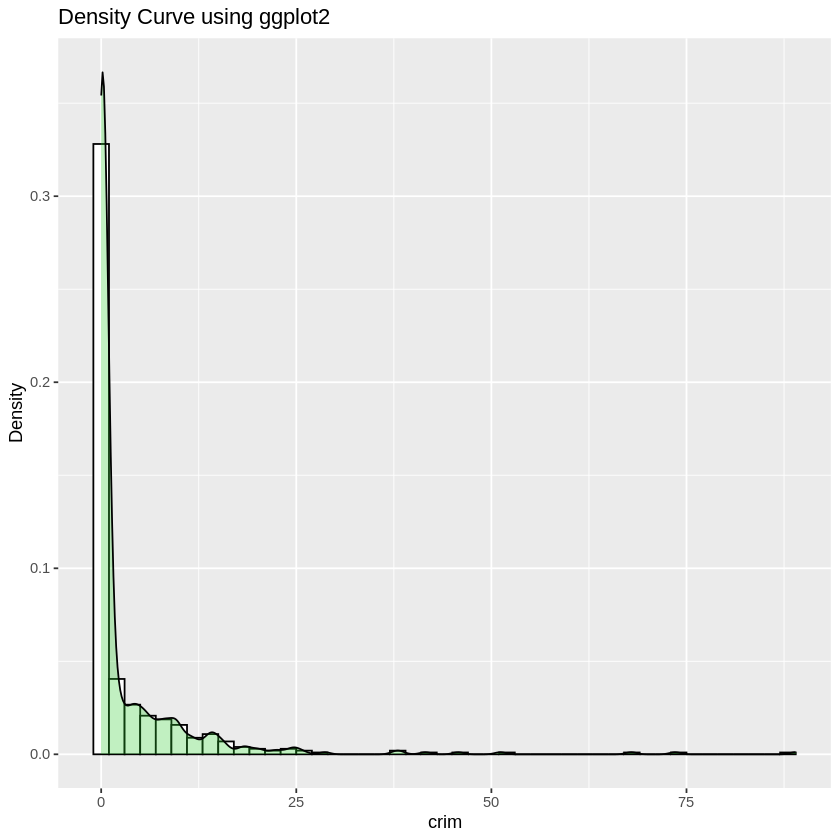

In [53]:
ggplot(housing, aes(x=housing$crim)) +
    geom_histogram(aes(y=..density..),      
                   binwidth=2,
                   colour="black", fill="white") +
    geom_density(alpha=.3, fill="#32CD32") +

labs(x = "crim", y = "Density", title = "Density Curve using ggplot2") 


## Change the Variable Names to Transformation

In [74]:
housing$crim_var <- housing$crim
housing$log_crim <- housing$crim

## Square Root Transformation.

In [ ]:
 sqrt_crim <-sqrt(housing$crim_var)

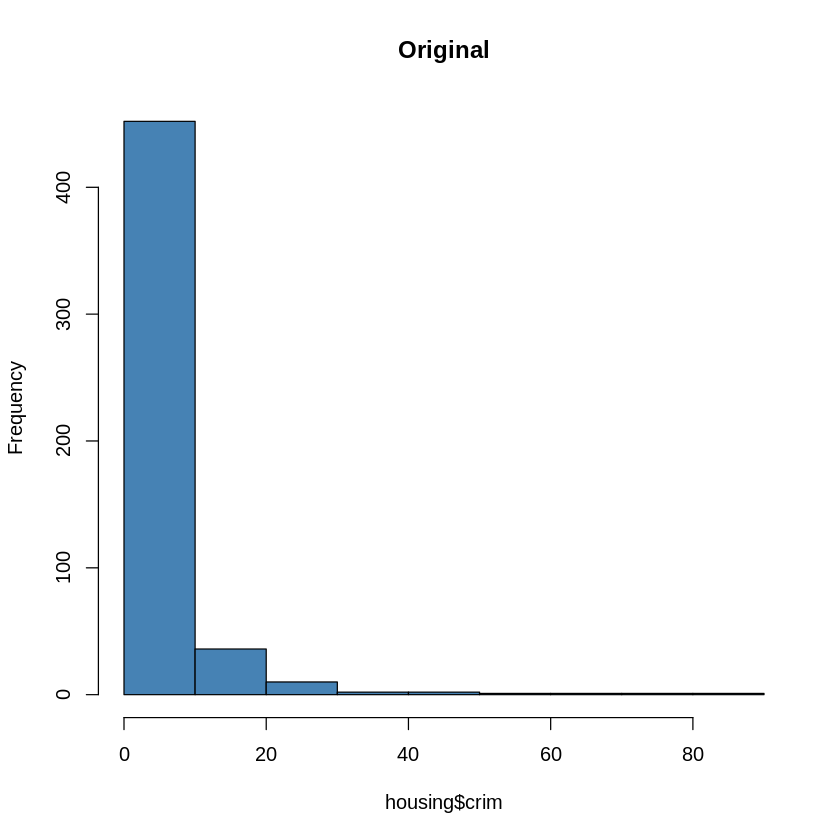

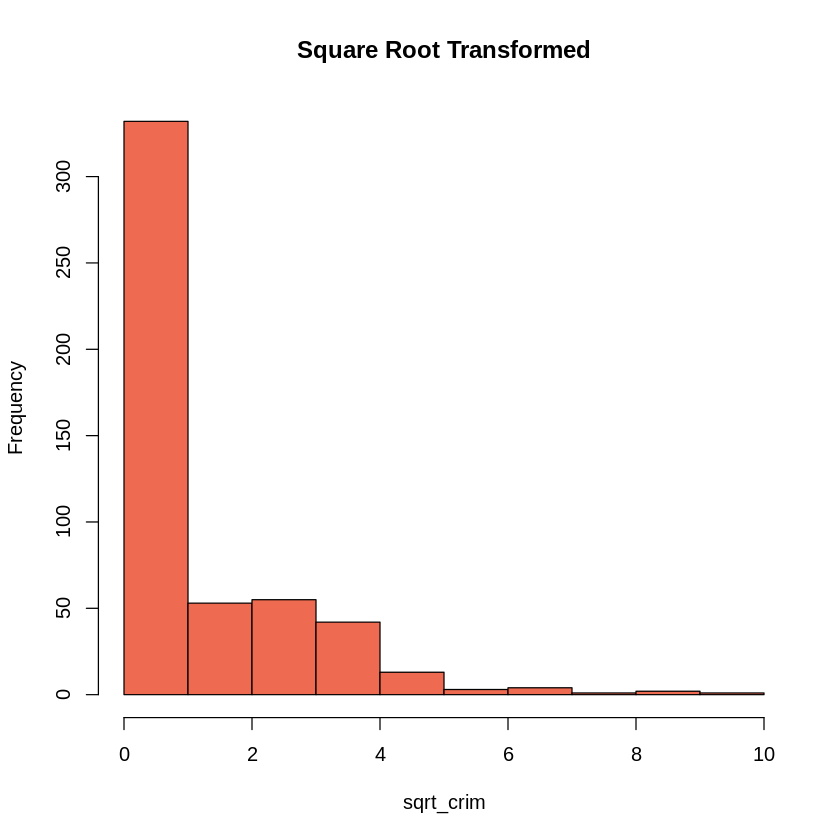

In [82]:
#create histogram for original distribution
hist(housing$crim, col='steelblue', main='Original')

#create histogram for square root-transformed distribution 
hist(sqrt_crim, col='coral2', main='Square Root Transformed')

## Log Transformation

In [ ]:
log_crim <- log10(housing$crim_var)

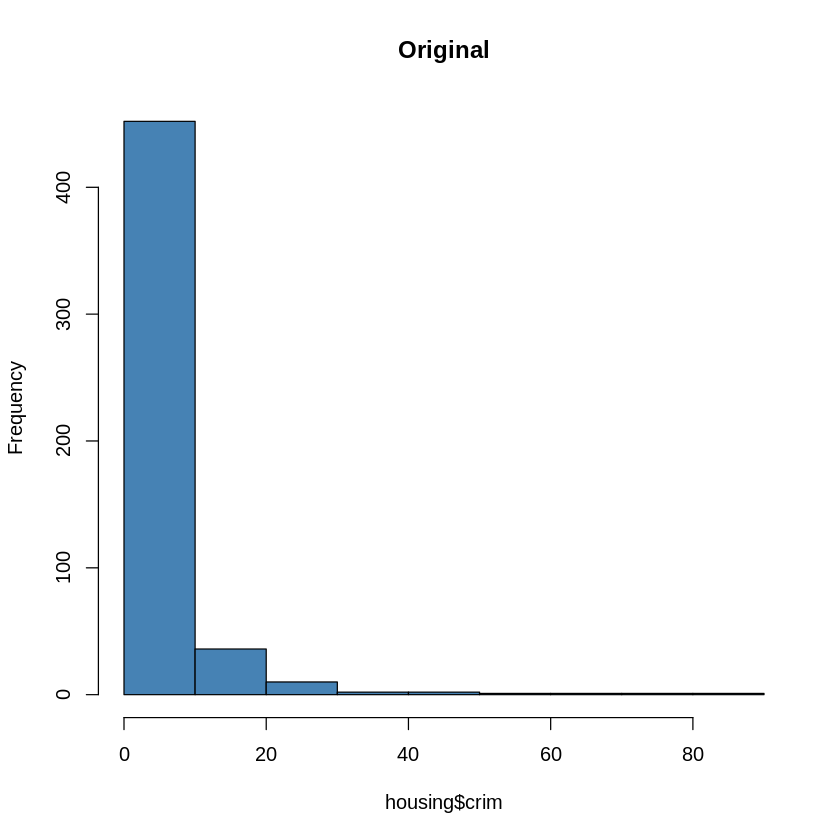

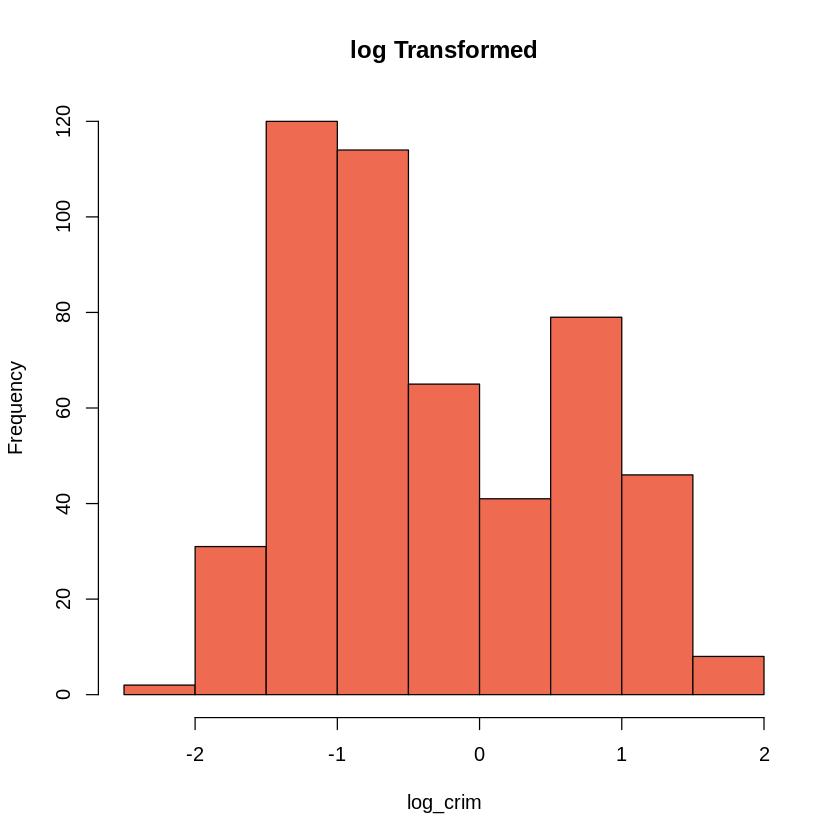

In [83]:
#create histogram for original distribution
hist(housing$crim, col='steelblue', main='Original')

#create histogram for square root-transformed distribution 
hist(log_crim, col='coral2', main='log Transformed')

# 06. Construct the New Variable

The log transformation seems to have de-skewed. 

Therefore, we can construct the new variables.

In [84]:
housing$log_crim <- log_crim

Important: Once you create the new variable, make sure delete the original variable

In [85]:
# Remove  Columns in List
housing <- housing[,!names(housing) %in% c("crim")]